In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data=pd.read_csv("data_for_lr.csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

# data preprocessing

In [7]:
data=data.dropna()
print("Shape of the data",data.shape)

Shape of the data (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# splitting data

In [9]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# lINEAR REGRESSION

## Forward Propogation  - 1

f(x)=m*x+c
-firstly learn mathematically approach then 
-then try to implement using the coing the fromula learn through mathematical approach and implement using function
-while making funtion firstly known the parameter we have and the parameter need for the formula and then try to implement

In [10]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## cost fuction - 2

summation(1/2n*(y-f(x))*2)

In [11]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

# GD for backpropagetion - 3 

by mathematically 
#df=f(x)-y/n taking mean because n is number of observation
#dm=df*x
#dc=df*1

d(cost)/d(m)=d(cost)/df *df/dm  #chain rule

In [12]:

 #here need to del-cost by del-m paramter pass
    #es for backpropagation  and update parameter
    #not do above average(mean) above so do here
    #now store this in dict
    #after backward propagation want to written d(cost)/D(m)
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update Parameter - 4

m(new) = m - (learning_rate*dm)
##c(new) = c - (learning_rate*dc)

In [13]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

# Model Training

#training function for trainnf a LR modeland use all these steps together to prapare thr algorithm


#printing output for each iteration 1 and iteration 2 output will overlap iteration 1 output
#we don't want all the output overlap so define axes  

In [14]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training

Iteration = 1, Loss = 2647.5953875201003


<Figure size 640x480 with 0 Axes>

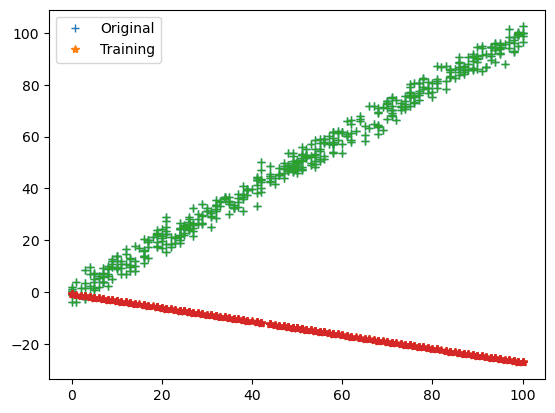

Iteration = 2, Loss = 1203.3720525938295


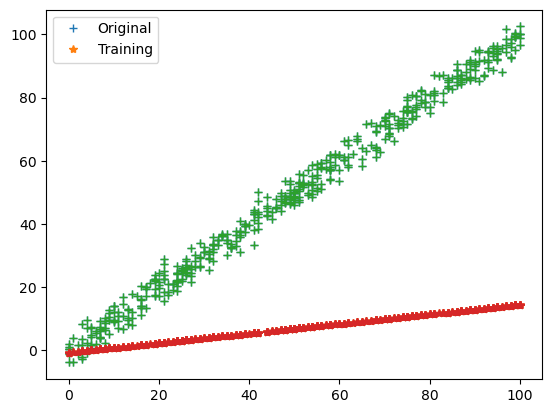

Iteration = 3, Loss = 548.1263249060893


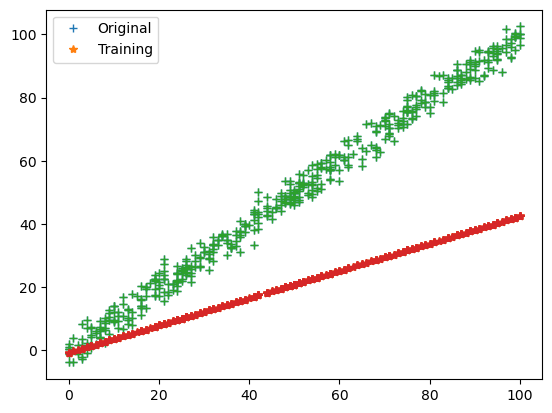

Iteration = 4, Loss = 250.84061152663327


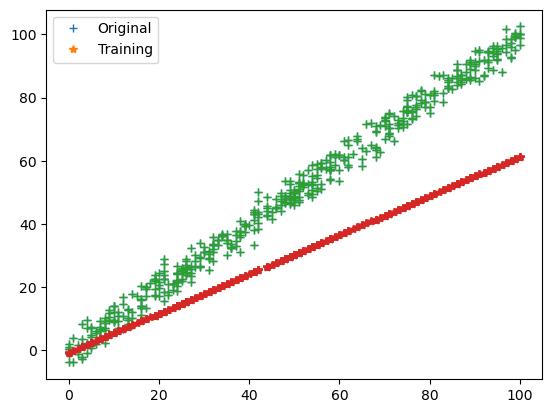

Iteration = 5, Loss = 115.96175313015861


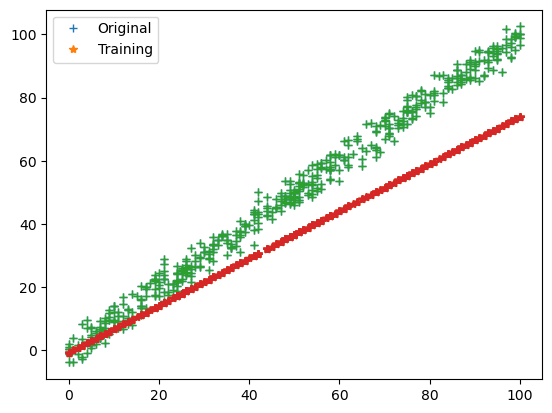

Iteration = 6, Loss = 54.76706472803645


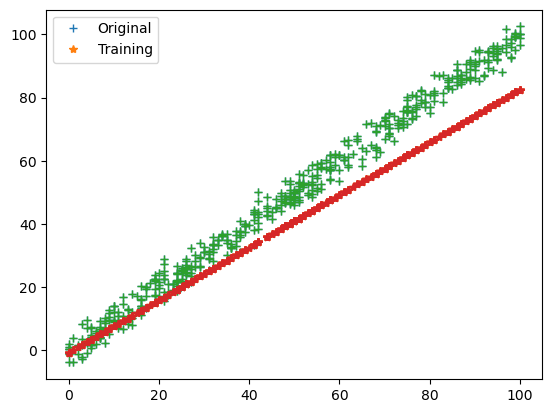

Iteration = 7, Loss = 27.00296586802344


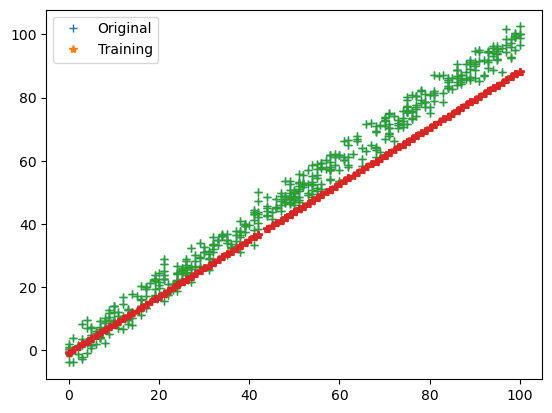

Iteration = 8, Loss = 14.406362512411965


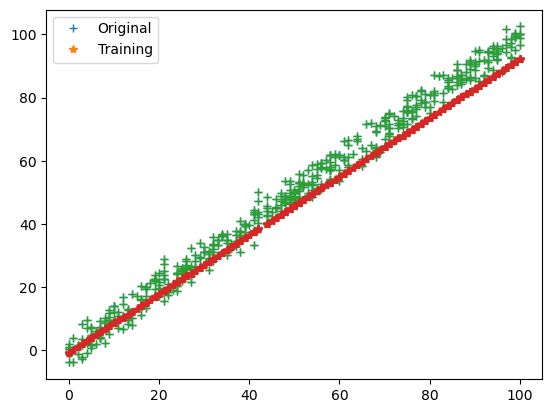

Iteration = 9, Loss = 8.691268667338456


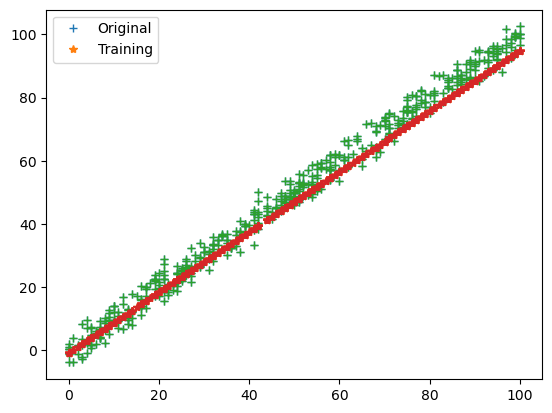

Iteration = 10, Loss = 6.098323309487479


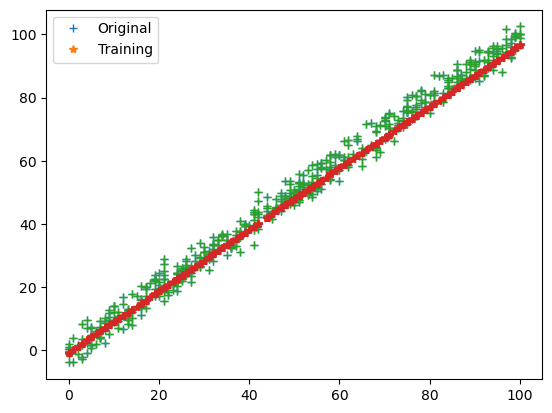

Iteration = 11, Loss = 4.921900178557533


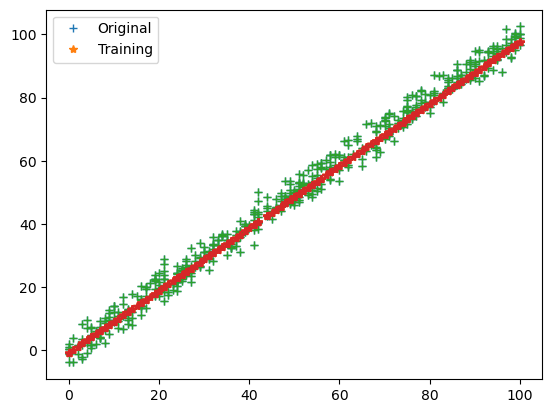

Iteration = 12, Loss = 4.388154751027917


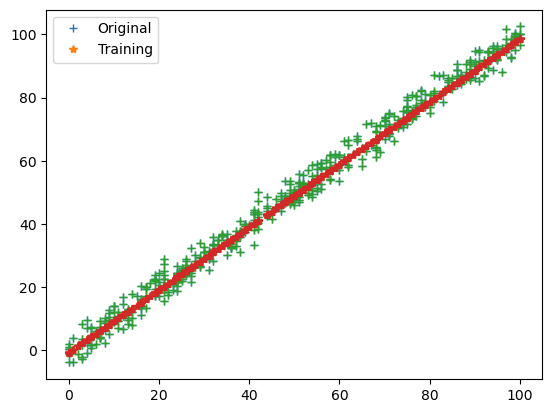

Iteration = 13, Loss = 4.1459929094352015


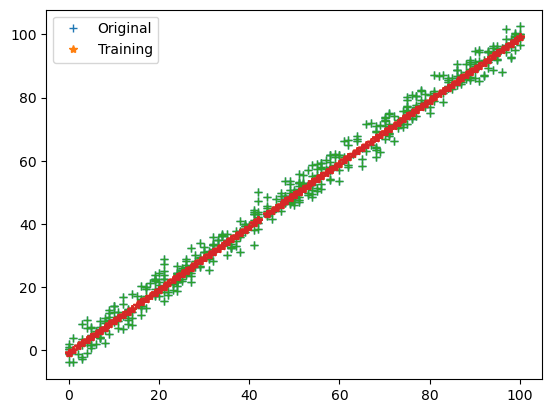

Iteration = 14, Loss = 4.036122863799905


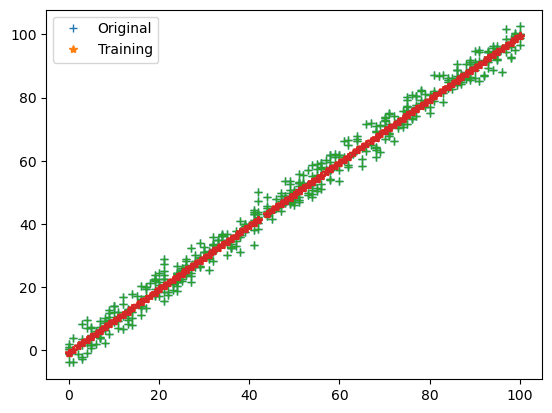

Iteration = 15, Loss = 3.9862737525701806


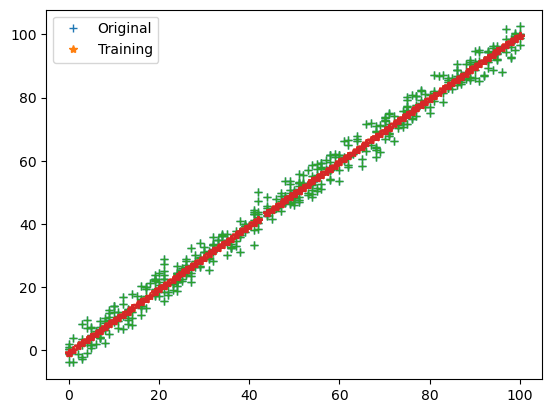

Iteration = 16, Loss = 3.9636562058097726


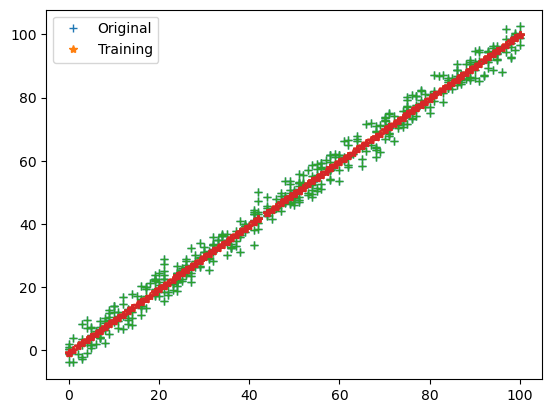

Iteration = 17, Loss = 3.95339365005974


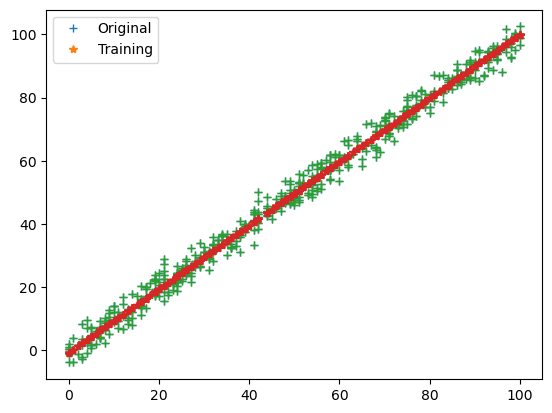

Iteration = 18, Loss = 3.948736567463855


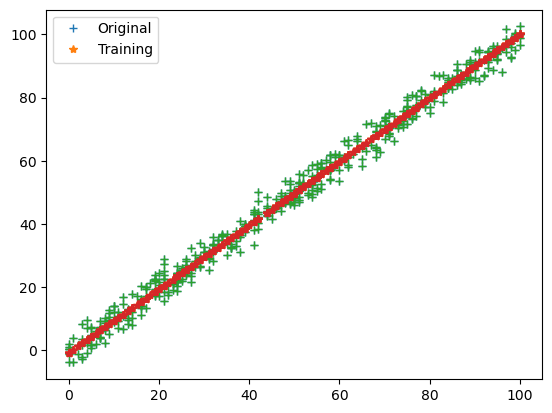

Iteration = 19, Loss = 3.9466226942946947


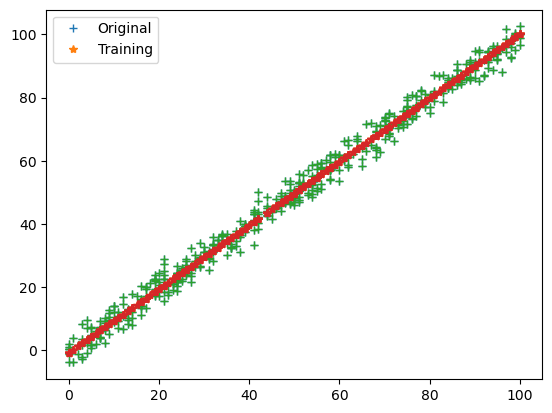

Iteration = 20, Loss = 3.9456626781072424


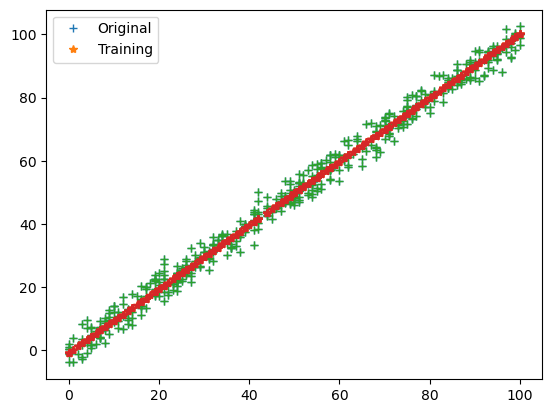

In [15]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [16]:
print(parameters)

{'m': 1.0084536339019736, 'c': -0.7594214341756769}


In [17]:
loss

[2647.5953875201003,
 1203.3720525938295,
 548.1263249060893,
 250.84061152663327,
 115.96175313015861,
 54.76706472803645,
 27.00296586802344,
 14.406362512411965,
 8.691268667338456,
 6.098323309487479,
 4.921900178557533,
 4.388154751027917,
 4.1459929094352015,
 4.036122863799905,
 3.9862737525701806,
 3.9636562058097726,
 3.95339365005974,
 3.948736567463855,
 3.9466226942946947,
 3.9456626781072424]

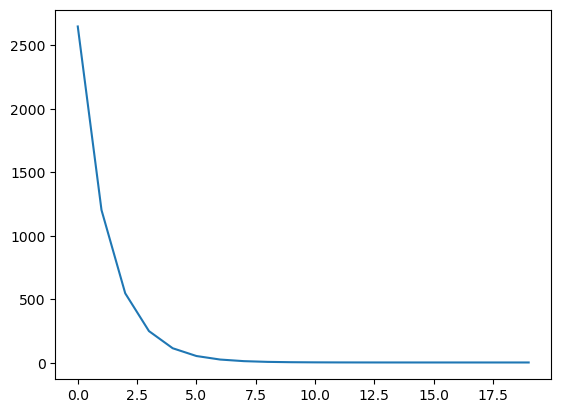

In [18]:
plt.plot(loss)

# prediction

In [19]:
test_predictions=test_input * parameters['m']+parameters['c']


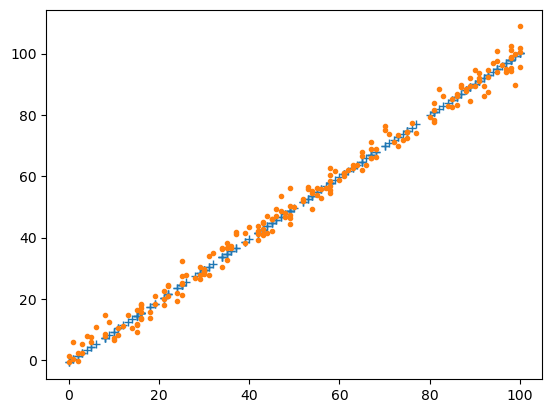

In [20]:
plt.plot(test_input,test_predictions,'+')
plt.plot(test_input,test_output,".")
plt.show()

# cost of prediction

In [21]:
cost_function(test_output,test_predictions)

4.115474947080386

In [23]:
#pred+-4.43 #we are predicting with error of 4.11